# Phase 2 - Coupled SEIR-Behavioral Dynamics

Full integration of epidemic dynamics with behavioral decision-making

#### The Feedback Loop
```
High Disease Prevalence
        ↓
Higher Perceived Risk
        ↓
More Vaccination
        ↓
Lower Prevalence
        ↓
Lower Perceived Risk (+ Complacency)
        ↓
Less Vaccination
        ↓
[CYCLE REPEATS]
```
#### Expected Behaviors
1. **Oscillations**: Coverage and prevalence oscillate (Bauch, 2005)
2. **Nash Equilibrium**: Settles below herd immunity threshold (Bauch & Earn, 2004)
3. **Policy Response**: Interventions can shift equilibrium closer to HIT
4. **Vaccine Scares**: Model can reproduce historical coverage drops 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import sys, os 
sys.path.append(os.path.abspath(os.path.join("..","src")))

from coupled_model import SEIRBehavioralModel, BehavioralDynamicsVisualizer
from behavioral_model import BehavioralParameters
from seirv_parameters import MeaslesParameters

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 100 

#%load_ext autoreload
# %autoreload 2

## Initialized Coupled Model

In [3]:
# epidemiological parameters
epi_params = MeaslesParameters(
    population_size=1_000_000,
    R0=15.0,
    initial_infected=100,
    initial_vaccinated=0.925,    # Current US coverage
)

# behavioral parameters (baseline)
behavioral_params = BehavioralParameters(
    vaccine_perceived_cost=46.0,
    vaccine_perceived_risk=0.0001,
    vaccine_perceived_severity=1000.0,
    disease_perceived_severity=300000.0,
    
    # WHO 3 C's
    confidence=0.88,                    # moderate confidence
    complacency_threshold=0.0001,        # 0.1% threshold
    complacency_strength=0.15,           # moderate complacency
    risk_perception_bias=1.0,         # accurate perception
    
    # behavioral economics
    risk_aversion = 1.0,
    
    # response dynamics
    behavioral_fraction = 0.1,

    # policy
    vaccine_subsidy = 0.0
)

# create coupled model
model = SEIRBehavioralModel(
    epi_params=epi_params,
    behavioral_params=behavioral_params,
    enable_feedback=True
)

print("Coupled SEIR-Behavioral Model Initialized")
print(f"R0 = {epi_params.R0}")
print(f"Herd Immunity Threshold = {(1 - 1/epi_params.R0)*100:.1f}%")
print(f"Initial Coverage = {epi_params.initial_vaccinated*100:.1f}%")
print(f"\nBehavioral feedback: ENABLED")

Coupled SEIR-Behavioral Model Initialized
R0 = 15.0
Herd Immunity Threshold = 93.3%
Initial Coverage = 92.5%

Behavioral feedback: ENABLED


## Run Baseline Simulation: Observe Feedback Loop

Running baseline simulation (10 years)...


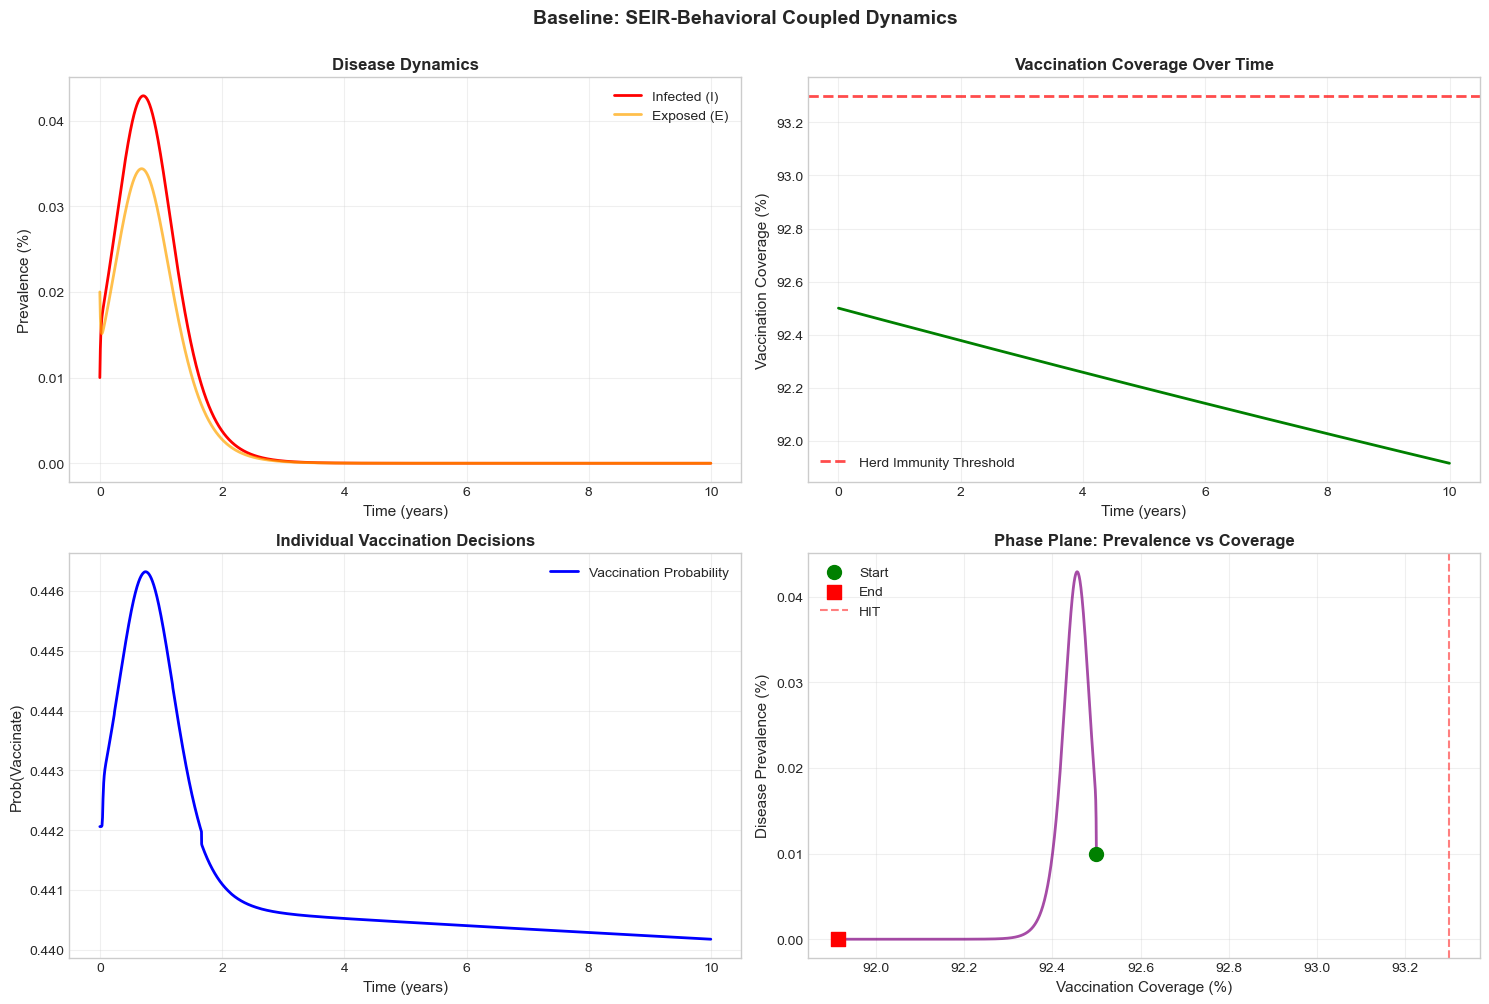

BASELINE SIMULATION SUMMARY:
Final vaccination coverage:    91.92%
Herd immunity threshold:       93.33%
Gap from HIT:                  1.42 pp

Total cases (10 years):        18,555
Attack rate:                   1.78%
Peak prevalence:               0.041%


In [4]:
# 10-year simulation
print("Running baseline simulation (10 years)...")
results_behavioral = model.simulate(t_max=3650)  # 10 years

# visualize
visualizer = BehavioralDynamicsVisualizer()
visualizer.plot_feedback_loop(
    results_behavioral,
    title="Baseline: SEIR-Behavioral Coupled Dynamics"
)

# print summary statistics
N = results_behavioral['S'][-1] + results_behavioral['E'][-1] + results_behavioral['I'][-1] + results_behavioral['R'][-1] + results_behavioral['V'][-1]
final_coverage = results_behavioral['V'][-1] / N * 100
total_cases = np.sum(results_behavioral['incidence'])
peak_prevalence = np.max(results_behavioral['I'] / N) * 100

print("BASELINE SIMULATION SUMMARY:")
print(f"Final vaccination coverage:    {final_coverage:.2f}%")
print(f"Herd immunity threshold:       {(1-1/epi_params.R0)*100:.2f}%")
print(f"Gap from HIT:                  {((1-1/epi_params.R0)*100 - final_coverage):.2f} pp")
print(f"\nTotal cases (10 years):        {total_cases:,.0f}")
print(f"Attack rate:                   {total_cases/N*100:.2f}%")
print(f"Peak prevalence:               {peak_prevalence:.3f}%")

In [ ]:
display(results_behavioral)